In [1]:
from statsmodels.tsa.api import ARDL
from statsmodels.tsa.ardl import ardl_select_order
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../data/transformed_data.csv")
data['Trade_deficit'] = -data['Trade_Balance']
data['log_Trade_deficit'] = np.log(data['Trade_deficit'])
data

,Trade_Balance,D_Exchange_Rate,D_Forex_Reserves,Trade_deficit,log_Trade_deficit
0,-41672.724400,0.4400,45180.000,41672.724400,10.637602
1,-71158.689100,0.6300,60450.000,71158.689100,11.172668
2,-71345.941700,0.5750,45570.000,71345.941700,11.175296
3,-65769.668900,-0.2220,64760.000,65769.668900,11.093914
4,-71603.879600,0.3219,38380.000,71603.879600,11.178905
...,...,...,...,...,...
116,-219301.236334,0.2998,102313.186,219301.236334,12.298202
117,-269706.868038,0.4085,-151913.146,269706.868038,12.505091
118,-175724.265519,1.1261,-189751.870,175724.265519,12.076671
119,-198759.819898,1.0182,-102530.216,198759.819898,12.199852


In [3]:
train_data = data[:100]
val_data = data[100:]

In [4]:
train_data

,Trade_Balance,D_Exchange_Rate,D_Forex_Reserves,Trade_deficit,log_Trade_deficit
0,-41672.724400,0.4400,45180.00,41672.724400,10.637602
1,-71158.689100,0.6300,60450.00,71158.689100,11.172668
2,-71345.941700,0.5750,45570.00,71345.941700,11.175296
3,-65769.668900,-0.2220,64760.00,65769.668900,11.093914
4,-71603.879600,0.3219,38380.00,71603.879600,11.178905
...,...,...,...,...,...
95,-139450.460549,-1.0475,82453.47,139450.460549,11.845465
96,-136864.123959,0.9429,62951.35,136864.123959,11.826744
97,-156043.668424,-0.4647,-97737.49,156043.668424,11.957891
98,-118414.894884,-0.4789,178406.80,118414.894884,11.681950


In [5]:
val_data

,Trade_Balance,D_Exchange_Rate,D_Forex_Reserves,Trade_deficit,log_Trade_deficit
100,-157789.773952,-0.6345,21551.820,157789.773952,11.969019
101,-156056.017000,0.2053,36369.090,156056.017000,11.957970
102,-198795.647004,0.4303,48665.290,198795.647004,12.200033
103,-166734.859038,0.3796,-28770.890,166734.859038,12.024160
104,-253274.315647,0.2112,-85596.330,253274.315647,12.442228
105,-177559.957547,0.0808,52496.770,177559.957547,12.087064
106,-156234.842112,-0.1014,111015.250,156234.842112,11.959116
107,-137587.944981,-0.1681,102226.570,137587.944981,11.832019
108,-161892.430000,-0.1559,28252.890,161892.430000,11.994687
109,-127271.769608,0.4585,25196.720,127271.769608,11.754080


In [6]:
timestamps = pd.read_excel('../data/final-data-assgn3.xlsx')['Month']

In [7]:
optimal_order = ardl_select_order(train_data['Trade_Balance'], 4, train_data[['D_Exchange_Rate', 'D_Forex_Reserves']], 4, ic='aic')
optimal_order.model.ardl_order

(2, 0)

In [8]:
opt_model = optimal_order.model.fit()
opt_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARDL Model Results                              
==============================================================================
Dep. Variable:          Trade_Balance   No. Observations:                  100
Model:                     ARDL(2, 0)   Log Likelihood               -1113.759
Method:               Conditional MLE   S.D. of innovations          20867.566
Date:                Mon, 28 Apr 2025   AIC                           2237.518
Time:                        23:01:58   BIC                           2250.443
Sample:                             2   HQIC                          2242.746
                                  100                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1.016e+04   5393.742     -1.883      0.063   -2.09e+04     553.035
Trade_Balance.L1       0.7024      0.105      6.692      0.000       0.494       0.911
Trade_Balance.L2       0.1999      0.105      1.896      0.061      -0.009       0.409
D_Exchange_Rate.L0 -3083.4346   1958.267     -1.575      0.119   -6971.619     804.750
======================================================================================
"""

In [9]:
model = ARDL(train_data['Trade_Balance'], 4, train_data[['D_Exchange_Rate', 'D_Forex_Reserves']], 4).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARDL Model Results                              
==============================================================================
Dep. Variable:          Trade_Balance   No. Observations:                  100
Model:                  ARDL(4, 4, 4)   Log Likelihood               -1088.195
Method:               Conditional MLE   S.D. of innovations          20260.392
Date:                Mon, 28 Apr 2025   AIC                           2208.389
Time:                        23:01:58   BIC                           2249.419
Sample:                             4   HQIC                          2224.974
                                  100                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -8049.0323   7490.947     -1.075      0.286    -2.3e+04    6855.603
Trade_Balance.L1        0.7407      0.116      6.383      0.000       0.510       0.972
Trade_Balance.L2        0.1964      0.151      1.300      0.197      -0.104       0.497
Trade_Balance.L3        0.0977      0.151      0.647      0.519      -0.203       0.398
Trade_Balance.L4       -0.1150      0.119     -0.965      0.338      -0.352       0.122
D_Exchange_Rate.L0  -3182.6285   2219.695     -1.434      0.155   -7599.126    1233.869
D_Exchange_Rate.L1    668.3765   2247.507      0.297      0.767   -3803.458    5140.211
D_Exchange_Rate.L2   1610.5028   2234.374      0.721      0.473   -2835.201    6056.207
D_Exchange_Rate.L3   -308.6321   2255.596     -0.137      0.892   -4796.560    4179.296
D_Exchange_Rate.L4   2027.6670   2215.279      0.915      0.363   -2380.043    6435.377
D_Forex_Reserves.L0     0.0192      0.035      0.547      0.586      -0.051       0.089
D_Forex_Reserves.L1    -0.0181      0.035     -0.512      0.610      -0.088       0.052
D_Forex_Reserves.L2    -0.0206      0.036     -0.575      0.567      -0.092       0.051
D_Forex_Reserves.L3     0.0341      0.037      0.915      0.363      -0.040       0.108
D_Forex_Reserves.L4    -0.0565      0.037     -1.526      0.131      -0.130       0.017
=======================================================================================
"""

In [10]:
opt_model_forecast = opt_model.forecast(21, val_data[['D_Exchange_Rate', 'D_Forex_Reserves']])
model_forecast = model.forecast(21, val_data[['D_Exchange_Rate', 'D_Forex_Reserves']])


Text(0.5, 1.0, 'Forecast vs Ground Truth')

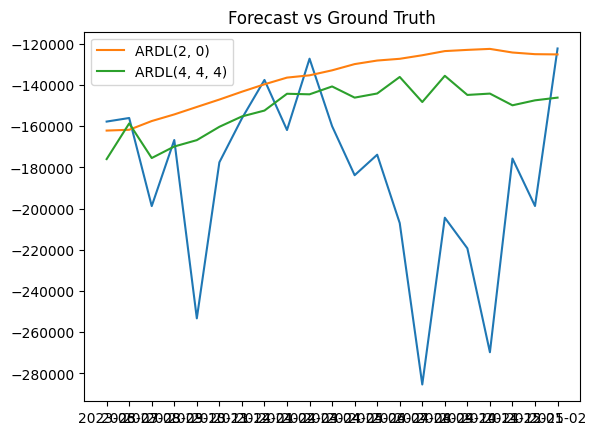

In [11]:
plt.figure()
plt.plot(timestamps[101:], val_data['Trade_Balance'])
plt.plot(timestamps[101:], opt_model_forecast, label = 'ARDL(2, 0)')
plt.plot(timestamps[101:], model_forecast, label = 'ARDL(4, 4, 4)')
plt.legend()
plt.title('Forecast vs Ground Truth')

In [12]:
log_optimal_order = ardl_select_order(train_data['log_Trade_deficit'], 4, train_data[['D_Exchange_Rate', 'D_Forex_Reserves']], 4, ic='aic')
log_optimal_order.model.ardl_order

(4, 0, 4)

In [13]:
log_opt_model = log_optimal_order.model.fit()
log_opt_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARDL Model Results                              
==============================================================================
Dep. Variable:      log_Trade_deficit   No. Observations:                  100
Model:                  ARDL(4, 0, 4)   Log Likelihood                 -27.075
Method:               Conditional MLE   S.D. of innovations              0.321
Date:                Mon, 28 Apr 2025   AIC                             78.151
Time:                        23:01:59   BIC                            108.923
Sample:                             4   HQIC                            90.590
                                  100                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.3132      0.972      2.380      0.020       0.381       4.246
log_Trade_deficit.L1     0.7373      0.105      7.000      0.000       0.528       0.947
log_Trade_deficit.L2    -0.1394      0.130     -1.070      0.288      -0.399       0.120
log_Trade_deficit.L3     0.3542      0.128      2.769      0.007       0.100       0.609
log_Trade_deficit.L4    -0.1544      0.107     -1.444      0.152      -0.367       0.058
D_Exchange_Rate.L0       0.0472      0.033      1.444      0.153      -0.018       0.112
D_Forex_Reserves.L0  -8.894e-07   5.52e-07     -1.612      0.111   -1.99e-06    2.07e-07
D_Forex_Reserves.L1   6.409e-07   5.55e-07      1.155      0.251   -4.63e-07    1.74e-06
D_Forex_Reserves.L2   1.452e-07   5.46e-07      0.266      0.791    -9.4e-07    1.23e-06
D_Forex_Reserves.L3  -1.416e-06   5.49e-07     -2.577      0.012   -2.51e-06   -3.24e-07
D_Forex_Reserves.L4   1.142e-06   5.63e-07      2.027      0.046    2.21e-08    2.26e-06
========================================================================================
"""

In [14]:
log_model = ARDL(train_data['log_Trade_deficit'], 4, train_data[['D_Exchange_Rate', 'D_Forex_Reserves']], 4).fit()
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARDL Model Results                              
==============================================================================
Dep. Variable:      log_Trade_deficit   No. Observations:                  100
Model:                  ARDL(4, 4, 4)   Log Likelihood                 -24.286
Method:               Conditional MLE   S.D. of innovations              0.312
Date:                Mon, 28 Apr 2025   AIC                             80.573
Time:                        23:01:59   BIC                            121.602
Sample:                             4   HQIC                            97.157
                                  100                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.7518      1.028      1.705      0.092      -0.293       3.796
log_Trade_deficit.L1     0.7402      0.109      6.763      0.000       0.522       0.958
log_Trade_deficit.L2    -0.1317      0.131     -1.008      0.316      -0.392       0.128
log_Trade_deficit.L3     0.3809      0.130      2.924      0.004       0.122       0.640
log_Trade_deficit.L4    -0.1405      0.111     -1.265      0.209      -0.361       0.080
D_Exchange_Rate.L0       0.0431      0.034      1.279      0.204      -0.024       0.110
D_Exchange_Rate.L1      -0.0270      0.034     -0.788      0.433      -0.095       0.041
D_Exchange_Rate.L2      -0.0475      0.034     -1.383      0.170      -0.116       0.021
D_Exchange_Rate.L3      -0.0548      0.035     -1.579      0.118      -0.124       0.014
D_Exchange_Rate.L4       0.0187      0.035      0.540      0.590      -0.050       0.088
D_Forex_Reserves.L0  -1.019e-06   5.59e-07     -1.822      0.072   -2.13e-06    9.39e-08
D_Forex_Reserves.L1   8.348e-07   5.73e-07      1.456      0.149   -3.06e-07    1.98e-06
D_Forex_Reserves.L2   3.666e-07   5.69e-07      0.645      0.521   -7.65e-07     1.5e-06
D_Forex_Reserves.L3  -1.502e-06    5.7e-07     -2.633      0.010   -2.64e-06   -3.67e-07
D_Forex_Reserves.L4   1.038e-06   5.78e-07      1.795      0.076   -1.13e-07    2.19e-06
========================================================================================
"""

In [15]:
log_opt_model_forecast = log_opt_model.forecast(21, val_data[['D_Exchange_Rate', 'D_Forex_Reserves']])
log_model_forecast = log_model.forecast(21, val_data[['D_Exchange_Rate', 'D_Forex_Reserves']])

Text(0.5, 1.0, 'Forecast vs Ground Truth')

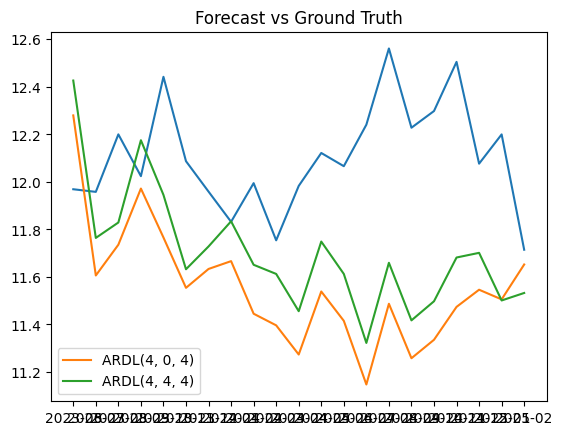

In [19]:
plt.figure()
plt.plot(timestamps[101:], val_data['log_Trade_deficit'])
plt.plot(timestamps[101:], log_opt_model_forecast, label = 'ARDL(4, 0, 4)')
plt.plot(timestamps[101:], log_model_forecast, label = 'ARDL(4, 4, 4)')
plt.legend()
plt.title('Forecast vs Ground Truth')